In [16]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web

In [17]:
df = pd.read_csv('tsla.csv', parse_dates = True, index_col = 0)

### Resample da dati giornalieri a dati ogni 10gg

In [18]:
# Open High Low Close
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()

df_ohlc.head()

,open,high,low,close
Date,,,,
2010-06-29,23.889999,23.889999,15.800000,17.459999
2010-07-09,17.400000,20.639999,17.049999,20.639999
2010-07-19,21.910000,21.910000,20.219999,20.719999
2010-07-29,20.350000,21.950001,19.590000,19.590000
2010-08-08,19.600000,19.600000,17.600000,19.150000


In [19]:
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates

In [20]:
df_ohlc.reset_index(inplace=True)
df_ohlc.head()

,Date,open,high,low,close
0,2010-06-29,23.889999,23.889999,15.800000,17.459999
1,2010-07-09,17.400000,20.639999,17.049999,20.639999
2,2010-07-19,21.910000,21.910000,20.219999,20.719999
3,2010-07-29,20.350000,21.950001,19.590000,19.590000
4,2010-08-08,19.600000,19.600000,17.600000,19.150000


In [21]:
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num) #dobbiamo trasfromare le date in qualcosa che piaccia a matplotplib
df_ohlc.head()

,Date,open,high,low,close
0,733952.0,23.889999,23.889999,15.800000,17.459999
1,733962.0,17.400000,20.639999,17.049999,20.639999
2,733972.0,21.910000,21.910000,20.219999,20.719999
3,733982.0,20.350000,21.950001,19.590000,19.590000
4,733992.0,19.600000,19.600000,17.600000,19.150000


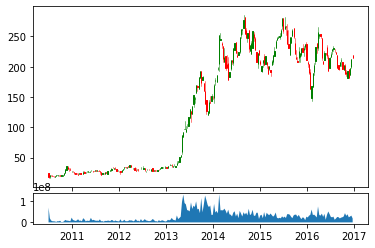

In [22]:
ax1 =  plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 =  plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1) # sharex così l'asse delle x viene condiviso

ax1.xaxis_date()

candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)

plt.show()